In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [3]:
torch.__version__

'1.12.1+cu113'

**Creation of Data:**

In [4]:
#linearly separable data
w=0.7
b=0.3

x=torch.arange(0,1,0.02).unsqueeze(dim=1)
y=w*x + b

In [5]:
x.shape

torch.Size([50, 1])

In [6]:
split=int(0.8 * len(x)) #80%
x_train, y_train, x_test, y_test = x[:split], y[:split], x[split:], y[split:]

len(x_train), len(x_test)

(40, 10)

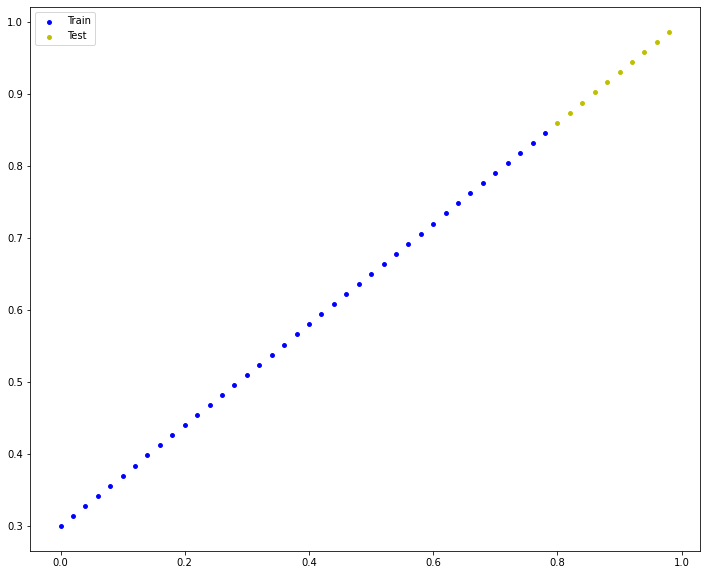

In [46]:
#visualization func:

def vizfunc(xtrain, ytrain, xtest, ytest, pred):
  plt.figure(figsize=(12,10))

  plt.scatter(xtrain, ytrain, c="b", s=15, label="Train")
  plt.scatter(xtest, ytest, c="y", s=15, label="Test")

  if pred is not None:
    plt.scatter(xtest, pred, c="r", s=15, label="Prediction")

  plt.legend()

vizfunc(x_train, y_train, x_test, y_test, None)    

**Model:**

In [25]:
class regressionModel(nn.Module):

  def __init__(self):
    super().__init__()

    self.weight = nn.Parameter(torch.randn( 1, dtype=torch.float), requires_grad=True) #start with 1 and update with gradient descent -- Autograd

    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  def forward(self, x: torch.Tensor) ->  torch.Tensor: #method from nn.module for computation
    return self.weight * x + self.bias #calculating y through linear regression by calculated weight and bias


In [ ]:
#prebuilt comp using nn.Linear

#gets input dim and output dim
class regressionModelLinear(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer=nn.Linear(in_features=1, out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)  


In [26]:
torch.manual_seed(42)
model1=regressionModel()
#params before training -- randomly initialized
model1.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

**Loss function and Optimizer:**

In [27]:
L1loss=nn.L1Loss()

optimizer=torch.optim.SGD(params=model1.parameters(), lr=0.01)

In [28]:
epoch_num=200

#storing vals for plotting
epoch_count=[]
train_loss=[]
test_loss=[]


for epoch in range(epoch_num):

  #TRAIN:
  model1.train() #train mode

  ypred_train=model1(x_train)
  trainloss=L1loss(ypred_train, y_train)

  optimizer.zero_grad()
  trainloss.backward()
  optimizer.step()

  #TEST:
  model1.eval() #eval mode
  
  with torch.inference_mode():
    y_pred=model1(x_test)
    testloss=L1loss(y_pred, y_test)
    
    if epoch%20 == 0:

      epoch_count.append(epoch)
      train_loss.append(trainloss.detach().numpy())
      test_loss.append(testloss.detach().numpy())

      print(f"Epoch: {epoch}   MAE Train Loss: {trainloss}   MAE Test Loss: {testloss} ")

Epoch: 0   MAE Train Loss: 0.31288138031959534   MAE Test Loss: 0.48106518387794495 
Epoch: 20   MAE Train Loss: 0.08908725529909134   MAE Test Loss: 0.21729660034179688 
Epoch: 40   MAE Train Loss: 0.04543796554207802   MAE Test Loss: 0.11360953003168106 
Epoch: 60   MAE Train Loss: 0.03818932920694351   MAE Test Loss: 0.08886633068323135 
Epoch: 80   MAE Train Loss: 0.03132382780313492   MAE Test Loss: 0.07232122868299484 
Epoch: 100   MAE Train Loss: 0.024458957836031914   MAE Test Loss: 0.05646304413676262 
Epoch: 120   MAE Train Loss: 0.01758546568453312   MAE Test Loss: 0.04060482233762741 
Epoch: 140   MAE Train Loss: 0.010716589167714119   MAE Test Loss: 0.024059748277068138 
Epoch: 160   MAE Train Loss: 0.0038517764769494534   MAE Test Loss: 0.008201557211577892 
Epoch: 180   MAE Train Loss: 0.008932482451200485   MAE Test Loss: 0.005023092031478882 


**PLOTTING:**

In [29]:
#params after training:
print(model1.state_dict())

print(f"Original weight = {w}, Original Bias = {b}")


OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])
Original weight = 0.7, Original Bias = 0.3


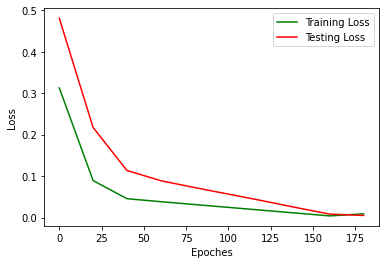

In [30]:
plt.plot(epoch_count, train_loss, c="g", label="Training Loss")
plt.plot(epoch_count, test_loss, c="r", label="Testing Loss")
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.legend()

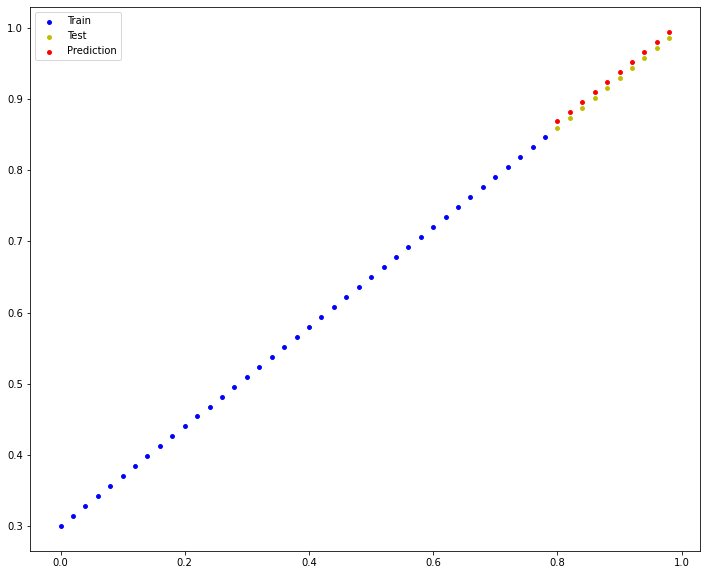

In [47]:
vizfunc(x_train, y_train, x_test, y_test, y_pred)  

Save and load state dict:

In [39]:
from pathlib import Path

model_path=Path("Models")
model_path.mkdir()
name="regression.pth"
torch.save(obj=model1.state_dict(), f=model_path / name)

In [42]:
loaded_model=regressionModel()
loaded_model.load_state_dict(torch.load(model_path / name))
loaded_model.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])